In [53]:
import pandas as pd
import numpy as np


def print_structured_dataframe(df):
    print(f"# Rows: {df.shape[0]}")
    print(f"# Rows dropna(): {df.dropna().shape[0]}")
    print(f"# Rows duplicated(): {df[df.duplicated()].shape[0]}")
    print(f"# Cols: {df.shape[1]}")

    structured_data = pd.DataFrame(
        columns=["Column", "D-Type", "Sample", "# Distinct values", "# Null values"]
    )

    for i, col in enumerate(df.columns):
        data_type = df[col].dtype
        sample = df[col][np.random.randint(0, df.shape[0] - 1)]
        unique_values = df[col].nunique()
        null_values = df[col].isnull().sum()

        structured_data.loc[i] = [col, data_type, sample, unique_values, null_values]

    display(structured_data)


df = pd.read_excel("Online-Retail-France.xlsx")
print_structured_dataframe(df)
display(df.head())

# Rows: 8557
# Rows dropna(): 8491
# Rows duplicated(): 16
# Cols: 7


,Column,D-Type,Sample,# Distinct values,# Null values
0,InvoiceNo,object,570672,461,0
1,StockCode,object,21137,1543,0
2,Description,object,JUMBO BAG WOODLAND ANIMALS,1565,0
3,Quantity,int64,12,77,0
4,InvoiceDate,object,2011-06-22 11:20:00,461,0
5,UnitPrice,float64,1.49,97,0
6,CustomerID,float64,12669.0,87,66


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0


In [54]:
def print_value_distribution(df, column_name):
    value_counts = df[column_name].value_counts().reset_index()
    value_counts.columns = ["Value", "#"]

    display(
        value_counts.style.set_caption(
            f'Distribution of "{column_name}"\n{value_counts.shape[0]} unique values'
        )
    )


# print_value_distribution(df, "Description")

In [55]:
df["Description"] = df["Description"].apply(str.strip)

# print_value_distribution(df, "Description")

In [56]:
from numpy import NaN

df.loc[
    (df["InvoiceNo"].apply(str.strip) == NaN)
    | (df["InvoiceNo"].str.isalpha())
    | (df["InvoiceNo"].str.isspace())
    | (~df["InvoiceNo"].str.isnumeric())
]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
178,C537893,22450,SILK PURSE BABUSHKA BLUE,-1,2010-12-09 10:14:00,3.35,12721.0
179,C537893,22634,CHILDS BREAKFAST SET SPACEBOY,-2,2010-12-09 10:14:00,9.95,12721.0
180,C537893,22630,DOLLY GIRL LUNCH BOX,-2,2010-12-09 10:14:00,1.95,12721.0
354,C539104,22662,LUNCH BAG DOLLY GIRL DESIGN,-3,2010-12-16 10:38:00,1.65,12494.0
356,C539114,22667,RECIPE BOX RETROSPOT,-3,2010-12-16 11:24:00,2.95,12494.0
...,...,...,...,...,...,...,...
8323,C580263,21934,SKULL SHOULDER BAG,-10,2011-12-02 12:43:00,1.65,12536.0
8324,C580263,21872,GLAMOROUS MUG,-12,2011-12-02 12:43:00,1.06,12536.0
8539,C581316,23020,GLASS SONGBIRD STORAGE JAR,-1,2011-12-08 11:46:00,12.50,12523.0
8540,C581316,21531,RED RETROSPOT SUGAR JAM BOWL,-1,2011-12-08 11:46:00,2.55,12523.0


In [57]:
display(df.loc[~(df["InvoiceNo"].apply(str.strip).str.startswith("C"))])

df = df.loc[~(df["InvoiceNo"].apply(str.strip).str.startswith("C"))]
print_structured_dataframe(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0
...,...,...,...,...,...,...,...
8552,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0
8553,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0
8554,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0
8555,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0


# Rows: 8408
# Rows dropna(): 8342
# Rows duplicated(): 15
# Cols: 7


,Column,D-Type,Sample,# Distinct values,# Null values
0,InvoiceNo,object,545583,392,0
1,StockCode,object,22320,1542,0
2,Description,object,RED RETROSPOT CUP,1563,0
3,Quantity,int64,12,55,0
4,InvoiceDate,object,2011-09-05 15:17:00,393,0
5,UnitPrice,float64,0.85,96,0
6,CustomerID,float64,12681.0,87,66


In [58]:
df = df.loc[~(df["Description"].str.contains("POSTAGE"))]
print_structured_dataframe(df)
df.head()

# Rows: 8108
# Rows dropna(): 8042
# Rows duplicated(): 15
# Cols: 7


,Column,D-Type,Sample,# Distinct values,# Null values
0,InvoiceNo,object,538008,387,0
1,StockCode,object,23286,1541,0
2,Description,object,GLASS JAR DAISY FRESH COTTON WOOL,1562,0
3,Quantity,int64,12,55,0
4,InvoiceDate,object,2011-04-04 11:18:00,388,0
5,UnitPrice,float64,0.85,92,0
6,CustomerID,float64,12637.0,87,66


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0


In [59]:
"""After the cleanup, we need to consolidate the items into one transaction per row with products one–hot–encoded. To do so, group by InvoiceNo and Description computing a sum on Quantity, use the Pandas unstack function to move the items from rows to columns, reset the index, fill the missing with zero, store the result in a new dataframe basket and inspect it."""

df2 = (
    df.groupby(["InvoiceNo", "Description"])["Quantity"]
    .sum()
    .unstack()
    .reset_index()
    .replace(NaN, 0)
)

print_structured_dataframe(df2)

# Rows: 387
# Rows dropna(): 387
# Rows duplicated(): 0
# Cols: 1563


,Column,D-Type,Sample,# Distinct values,# Null values
0,InvoiceNo,object,570823,387,0
1,10 COLOUR SPACEBOY PEN,float64,0.0,3,0
2,12 COLOURED PARTY BALLOONS,float64,0.0,2,0
3,12 EGG HOUSE PAINTED WOOD,float64,0.0,2,0
4,12 MESSAGE CARDS WITH ENVELOPES,float64,0.0,2,0
...,...,...,...,...,...
1558,ZINC FOLKART SLEIGH BELLS,float64,0.0,3,0
1559,ZINC HERB GARDEN CONTAINER,float64,0.0,2,0
1560,ZINC METAL HEART DECORATION,float64,0.0,3,0
1561,ZINC T-LIGHT HOLDER STAR LARGE,float64,0.0,2,0


In [60]:
invoice_No = df2["InvoiceNo"]
df2 = df2.astype(float) > 0
df2["InvoiceNo"] = invoice_No

print_structured_dataframe(df2)
df2.head()

# Rows: 387
# Rows dropna(): 387
# Rows duplicated(): 0
# Cols: 1563


,Column,D-Type,Sample,# Distinct values,# Null values
0,InvoiceNo,object,546765,387,0
1,10 COLOUR SPACEBOY PEN,bool,False,2,0
2,12 COLOURED PARTY BALLOONS,bool,False,2,0
3,12 EGG HOUSE PAINTED WOOD,bool,False,2,0
4,12 MESSAGE CARDS WITH ENVELOPES,bool,False,2,0
...,...,...,...,...,...
1558,ZINC FOLKART SLEIGH BELLS,bool,False,2,0
1559,ZINC HERB GARDEN CONTAINER,bool,False,2,0
1560,ZINC METAL HEART DECORATION,bool,False,2,0
1561,ZINC T-LIGHT HOLDER STAR LARGE,bool,False,2,0


Description,InvoiceNo,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
0,536370,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,536852,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,536974,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,537065,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,537463,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
"""find the maximum value of min_support such that the number of rules
generated from the frequent itemsets with lift not less than 1 is at least
20. Show the value obtained for min_support and show the rules.
Hint: use a loop with an initial value min_support=1 and decrease it in
steps -0.01
Hint: In apriori set the parameter use_colnames=True."""

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

max_min_sup = 0
for min_sup in [*range(100, 0, -1)]:
    min_sup = min_sup / 100
    frequent_itemsets = apriori(
        df2.drop("InvoiceNo", axis=1), use_colnames=True, min_support=min_sup
    )
    if frequent_itemsets.shape[0] > 0:
        rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
        if rules.shape[0] >= 20 and min_sup > max_min_sup:
            max_min_sup = min_sup

print("maximum value of min_support: ", max_min_sup)
rules = association_rules(
    apriori(df2.drop("InvoiceNo", axis=1), use_colnames=True, min_support=max_min_sup),
    metric="lift",
    min_threshold=1,
)
rules

maximum value of min_support:  0.08


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.098191,0.095607,0.080103,0.815789,8.532717,0.070716,4.909561,0.978926
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.095607,0.098191,0.080103,0.837838,8.532717,0.070716,5.561154,0.976129
2,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN SPACEBOY),0.170543,0.139535,0.090439,0.530303,3.800505,0.066643,1.831958,0.888385
3,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE),0.139535,0.170543,0.090439,0.648148,3.800505,0.066643,2.357405,0.856371
4,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.170543,0.173127,0.103359,0.606061,3.500678,0.073834,2.098986,0.861215
5,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.173127,0.170543,0.103359,0.597015,3.500678,0.073834,2.058283,0.863906
6,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.139535,0.173127,0.105943,0.759259,4.385572,0.081786,3.434705,0.897165
7,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.173127,0.139535,0.105943,0.611940,4.385572,0.081786,2.217352,0.933613
8,(SET/6 RED SPOTTY PAPER CUPS),(SET/20 RED RETROSPOT PAPER NAPKINS),0.139535,0.134367,0.103359,0.740741,5.512821,0.084610,3.338870,0.951351
9,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER CUPS),0.134367,0.139535,0.103359,0.769231,5.512821,0.084610,3.728682,0.945672


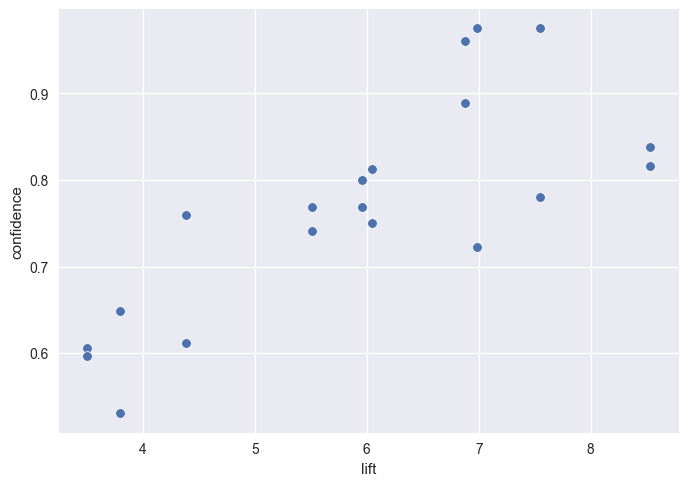

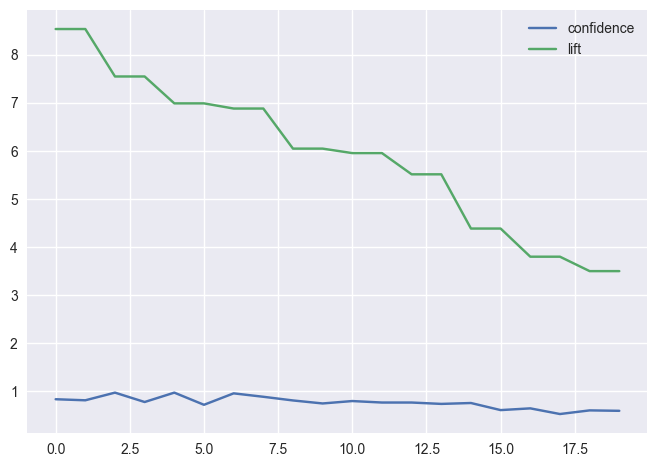

In [77]:
import matplotlib.pyplot as plt

from seaborn import scatterplot

scatterplot(
    rules.sort_values(["lift", "confidence"], ascending=False).reset_index(drop=True),
    x="lift",
    y="confidence",
)
plt.show()